# US Top Tracks by Genre, Artist, and Region on Spotify!
#### By Sophia Ray and Greg Laursen

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
from spotify_secret import secret

In [3]:
cid = '42260a29597e4ccaae16231626f73ce8'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
playlist_link = "https://open.spotify.com/playlist/3aTYOIaiU9lsysHRCMppEU?si=QYThke-KQke898Y28mpdQw"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [5]:
def get_all_playlist_tracks(playlist_URI):
    results = sp.playlist_tracks(playlist_URI, limit=100)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

In [6]:
playlist_dict = {'track_uri': list(),
                'track_name': list(),
                'artist_name': list(),
                'album': list(),
                'track_pop': list()}

In [8]:
billboard_playlist = get_all_playlist_tracks(playlist_URI)

for track_item in billboard_playlist:
    track = track_item["track"]
    track_uri = track.get("uri", "Unknown Track URI")
        
    track_name = track.get("name", "Unknown Track Name")
        
    artist = track["artists"][0] if track["artists"] else {"uri": "Unknown Artist URI", "name": "Unknown Artist Name"}
    artist_name = artist.get("name", "Unknown Artist Name")
        
    album = track.get("album", {}).get("name", "Unknown Album Name")
    track_pop = track.get("popularity", 0)
    
    playlist_dict['track_uri'].append(track_uri)
    playlist_dict['track_name'].append(track_name)
    playlist_dict['artist_name'].append(artist_name)
    playlist_dict['album'].append(album)
    playlist_dict['track_pop'].append(track_pop)

playlist_dict

{'track_uri': ['spotify:track:5dae01pKNjRQtgOeAkFzPY',
  'spotify:track:6XzXeNu7FuUttdTwVl0rG1',
  'spotify:track:33FdwvfiSBRbE2AQ4UehaR',
  'spotify:track:4yDNxMcQCjnCg9lLoKAH0I',
  'spotify:track:5uEwpyOYHFGqme4WnVQhfs',
  'spotify:track:4uq2Zctom8rlXuL3Omm77g',
  'spotify:track:7hHOmImd35ZdKovBNSQXk8',
  'spotify:track:2dQ6cleOtvk3iGjCRMlInT',
  'spotify:track:17wEjjWqgu0HlSbb57zrOl',
  'spotify:track:6LkJcX34c0lPCNfHXZiVVo',
  'spotify:track:1M4oXWd93RwPzt6Ns9h1Nc',
  'spotify:track:4cebVIEpo3f2Pks50fATbc',
  'spotify:track:0BHroBUvBAp561BYqC9LRK',
  'spotify:track:18OOWYpby2ZvjBGokvInzp',
  'spotify:track:1v52YkW75eN4RJ2EyDdQVI',
  'spotify:track:19vjeNqhgk0vhH5TuxDok9',
  'spotify:track:2G597vEgxsvckPwocEHY9Y',
  'spotify:track:7z03paoXvhCzN22twdfPHR',
  'spotify:track:11I6S3cRw3rQiToU1uYjVZ',
  'spotify:track:6SHADtq8nTZCUTjyP7HJqf',
  'spotify:track:4lh2f3aeRv0GcTUwP4Ydi1',
  'spotify:track:75dwXgnlK10c8YtvUODVbj',
  'spotify:track:28IBsttOK2aG9Cb4QtqhMr',
  'spotify:track:4Gx5

In [9]:
import pandas as pd
billboard_df = pd.DataFrame(playlist_dict)

billboard_df.head()

track_uri  \
0  spotify:track:5dae01pKNjRQtgOeAkFzPY   
1  spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2  spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3  spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4  spotify:track:5uEwpyOYHFGqme4WnVQhfs   

                                          track_name           artist_name  \
0                                          Mona Lisa         Nat King Cole   
1  The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2              Play A Simple Melody - Single Version  Gary Crosby & Friend   
3       (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                The Third Man Theme          Guy Lombardo   

                                           album  track_pop  
0                                  Unforgettable         54  
1  Classical Music: 50 of the Best Film Classics         27  
2             Bing-His Legendary Years 1931-1957          8  
3                     A Sweet Old-Fashioned Girl          0  
4                   Guy Lombardo On Planet Swing          5

In [10]:
def get_all_playlist_tracks_uris(playlist_URI):
    results = sp.playlist_tracks(playlist_URI, limit=100)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    track_uris = [track['track']['uri'] for track in tracks]
    
    return track_uris

all_track_uris = get_all_playlist_tracks_uris(playlist_URI)

In [ ]:
## trends over time in terms of genre popularity
## having issues gettting the api to cooperate!


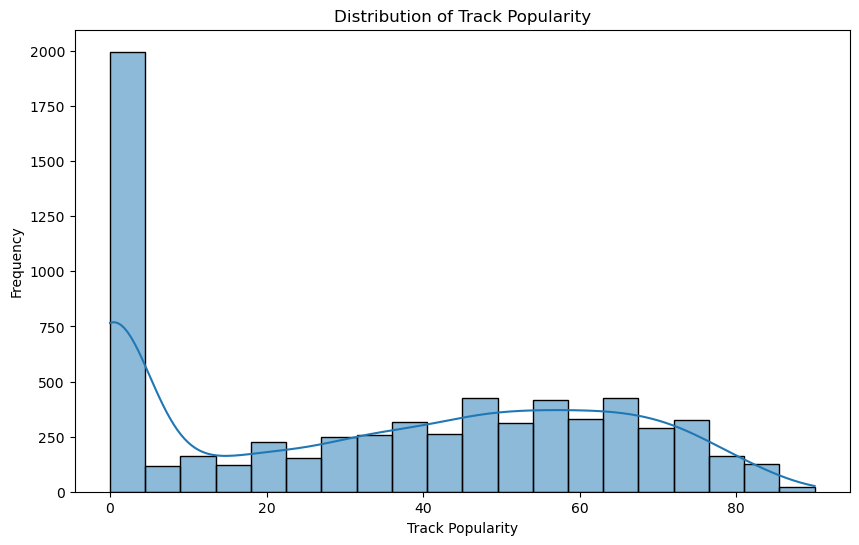

KeyError: 'artist_pop'

<Figure size 1000x600 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(billboard_df['track_pop'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(billboard_df['artist_pop'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Frequency')
plt.show()

In [13]:
tracks_df = billboard_df.copy()


import pandas as pd

def get_all_audio_features_from_dataframe(tracks_df):
    # Extract track IDs from the 'track_uri' column
    tracks_df['track_id'] = tracks_df['track_uri'].str.split(':').str[-1]

    # Function to fetch audio features in batches
    def fetch_audio_features(track_ids):
        audio_features = []
        for i in range(0, len(track_ids), 100):  # Process 100 IDs at a time
            batch = track_ids[i:i+100]
            features = sp.audio_features(batch)
            # Filter out None values
            audio_features.extend([f for f in features if f is not None])
        return audio_features

    # Fetch the audio features
    track_ids = tracks_df['track_id'].tolist()
    audio_features = fetch_audio_features(track_ids)

    # Check if audio_features is empty
    if not audio_features:
        raise ValueError("No audio features were returned. Check the track IDs or API limits.")

    # Create a DataFrame from the audio features
    features_df = pd.DataFrame(audio_features)

    # Merge audio features back into the original DataFrame
    enriched_df = pd.merge(tracks_df, features_df, left_on='track_id', right_on='id', how='left')

    # Drop the temporary 'track_id' and redundant 'id' columns
    enriched_df = enriched_df.drop(columns=['track_id', 'id'])

    return enriched_df



enriched_tracks_data = get_all_audio_features_from_dataframe(tracks_df)


# Print the enriched DataFrame
print(enriched_tracks_data)



                                 track_uri  \
0     spotify:track:5dae01pKNjRQtgOeAkFzPY   
1     spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2     spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3     spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4     spotify:track:5uEwpyOYHFGqme4WnVQhfs   
...                                    ...   
6926  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6927  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6928  spotify:track:77khP2fIVhSW23NwxrRluh   
6929  spotify:track:77khP2fIVhSW23NwxrRluh   
6930  spotify:track:7cv28LXcjAC3GsXbUvXKbX   

                                             track_name           artist_name  \
0                                             Mona Lisa         Nat King Cole   
1     The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2                 Play A Simple Melody - Single Version  Gary Crosby & Friend   
3          (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                   The Th

In [15]:
def get_release_dates(tracks_df, sp):
    """
    Fetch release dates for valid tracks in the given dataframe and append them.
    
    Parameters:
        tracks_df (pd.DataFrame): Input dataframe containing a 'track_uri' column.
        sp (spotipy.Spotify): Authenticated Spotify API client.
        
    Returns:
        pd.DataFrame: DataFrame with an additional 'release_date' column.
    """
    if 'track_uri' not in tracks_df.columns:
        raise ValueError("The dataframe must contain a column named 'track_uri'.")

    # Extract track IDs from the 'track_uri' column
    tracks_df['track_id'] = tracks_df['track_uri'].str.split(':').str[-1]

    # Validate and filter track IDs
    valid_ids = tracks_df['track_id'].dropna().tolist()
    valid_ids = [track_id for track_id in valid_ids if len(track_id) == 22]  # Spotify IDs are 22 characters

    if not valid_ids:
        raise ValueError("No valid track IDs found in the dataframe.")

    # Function to fetch release dates in batches
    def fetch_release_dates(track_ids):
        release_dates = []
        for i in range(0, len(track_ids), 100):  # Process 100 IDs at a time
            batch = track_ids[i:i+100]
            try:
                tracks = sp.tracks(batch)['tracks']  # Get metadata for each track
                release_dates.extend(
                    [track.get('album', {}).get('release_date', None) for track in tracks]
                )
            except Exception as e:
                print(f"Error fetching batch: {batch}. Error: {e}")
                release_dates.extend([None] * len(batch))  # Placeholder for failed requests
        return release_dates

    # Fetch the release dates
    release_dates = fetch_release_dates(valid_ids)

    # Create a mapping of track IDs to release dates
    release_date_map = dict(zip(valid_ids, release_dates))

    # Map release dates back to the original dataframe
    tracks_df['release_date'] = tracks_df['track_id'].map(release_date_map)

    # Drop the temporary 'track_id' column
    tracks_df.drop(columns=['track_id'], inplace=True)

    return tracks_df

In [16]:
updated_tracks_df = get_release_dates(enriched_tracks_data, sp)

# Print the updated DataFrame
print(updated_tracks_df)

                                 track_uri  \
0     spotify:track:5dae01pKNjRQtgOeAkFzPY   
1     spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2     spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3     spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4     spotify:track:5uEwpyOYHFGqme4WnVQhfs   
...                                    ...   
6926  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6927  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6928  spotify:track:77khP2fIVhSW23NwxrRluh   
6929  spotify:track:77khP2fIVhSW23NwxrRluh   
6930  spotify:track:7cv28LXcjAC3GsXbUvXKbX   

                                             track_name           artist_name  \
0                                             Mona Lisa         Nat King Cole   
1     The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2                 Play A Simple Melody - Single Version  Gary Crosby & Friend   
3          (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                   The Th

In [17]:
updated_tracks_df.columns

Index(['track_uri', 'track_name', 'artist_name', 'album', 'track_pop',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'release_date'],
      dtype='object')

In [20]:
from tqdm import tqdm 

# Function to fetch genres for an artist
def get_genres(sp, artist_name):
    try:
        results = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)
        if results['artists']['items']:
            return results['artists']['items'][0]['genres']
        else:
            return []
    except Exception as e:
        print(f"Error fetching genres for {artist_name}: {e}")
        return []

# Add genre information to DataFrame
def add_genres_to_dataframe(df, sp, artist_col='artist_name'):
    genres_list = []
    for artist in tqdm(df[artist_col], desc="Fetching genres"):
        genres = get_genres(sp, artist)
        genres_list.append(", ".join(genres))  # Join multiple genres into a single string
    df['genres'] = genres_list
    return df


updated_tracks_df_genre = add_genres_to_dataframe(updated_tracks_df, sp)

Fetching genres:   8%|█▌                   | 530/6931 [01:03<2:30:07,  1.41s/it]

Error fetching genres for The Four Preps: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


Fetching genres: 100%|██████████████████████| 6931/6931 [13:35<00:00,  8.50it/s]


In [21]:
updated_tracks_df_genre.head()

track_uri  \
0  spotify:track:5dae01pKNjRQtgOeAkFzPY   
1  spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2  spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3  spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4  spotify:track:5uEwpyOYHFGqme4WnVQhfs   

                                          track_name           artist_name  \
0                                          Mona Lisa         Nat King Cole   
1  The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2              Play A Simple Melody - Single Version  Gary Crosby & Friend   
3       (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                The Third Man Theme          Guy Lombardo   

                                           album  track_pop  danceability  \
0                                  Unforgettable         54         0.241   
1  Classical Music: 50 of the Best Film Classics         27         0.496   
2             Bing-His Legendary Years 1931-1957          8         0.659   
3                     A Sweet Old-Fashioned Girl          0         0.753   
4                   Guy Lombardo On Planet Swing          5         0.788   

   energy   key  loudness  mode  ...  valence    tempo            type  \
0   0.237   1.0   -12.201   1.0  ...    0.303  174.578  audio_features   
1   0.523   2.0   -11.518   1.0  ...    0.915  145.126  audio_features   
2   0.229  10.0   -13.755   1.0  ...    0.829  138.805  audio_features   
3   0.446   7.0   -14.380   1.0  ...    0.921   99.115  audio_features   
4   0.158   0.0   -12.071   1.0  ...    0.569  115.551  audio_features   

                                    uri  \
0  spotify:track:5dae01pKNjRQtgOeAkFzPY   
1  spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2  spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3  spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4  spotify:track:5uEwpyOYHFGqme4WnVQhfs   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5dae01pKNjRQ...   
1  https://api.spotify.com/v1/tracks/6XzXeNu7FuUt...   
2  https://api.spotify.com/v1/tracks/33FdwvfiSBRb...   
3  https://api.spotify.com/v1/tracks/4yDNxMcQCjnC...   
4  https://api.spotify.com/v1/tracks/5uEwpyOYHFGq...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5dae...    194987.0   
1  https://api.spotify.com/v1/audio-analysis/6XzX...    127613.0   
2  https://api.spotify.com/v1/audio-analysis/33Fd...    175693.0   
3  https://api.spotify.com/v1/audio-analysis/4yDN...    160667.0   
4  https://api.spotify.com/v1/audio-analysis/5uEw...    179040.0   

  time_signature release_date  \
0            3.0   1954-01-01   
1            3.0   2012-10-01   
2            3.0   1993-01-01   
3            4.0   1995-01-01   
4            4.0   2012-02-24   

                                              genres  
0  adult standards, easy listening, lounge, soul,...  
1                                             zither  
2                                                     
3                               deep adult standards  
4  big band, british dance band, swing, tin pan a...  

[5 rows x 24 columns]

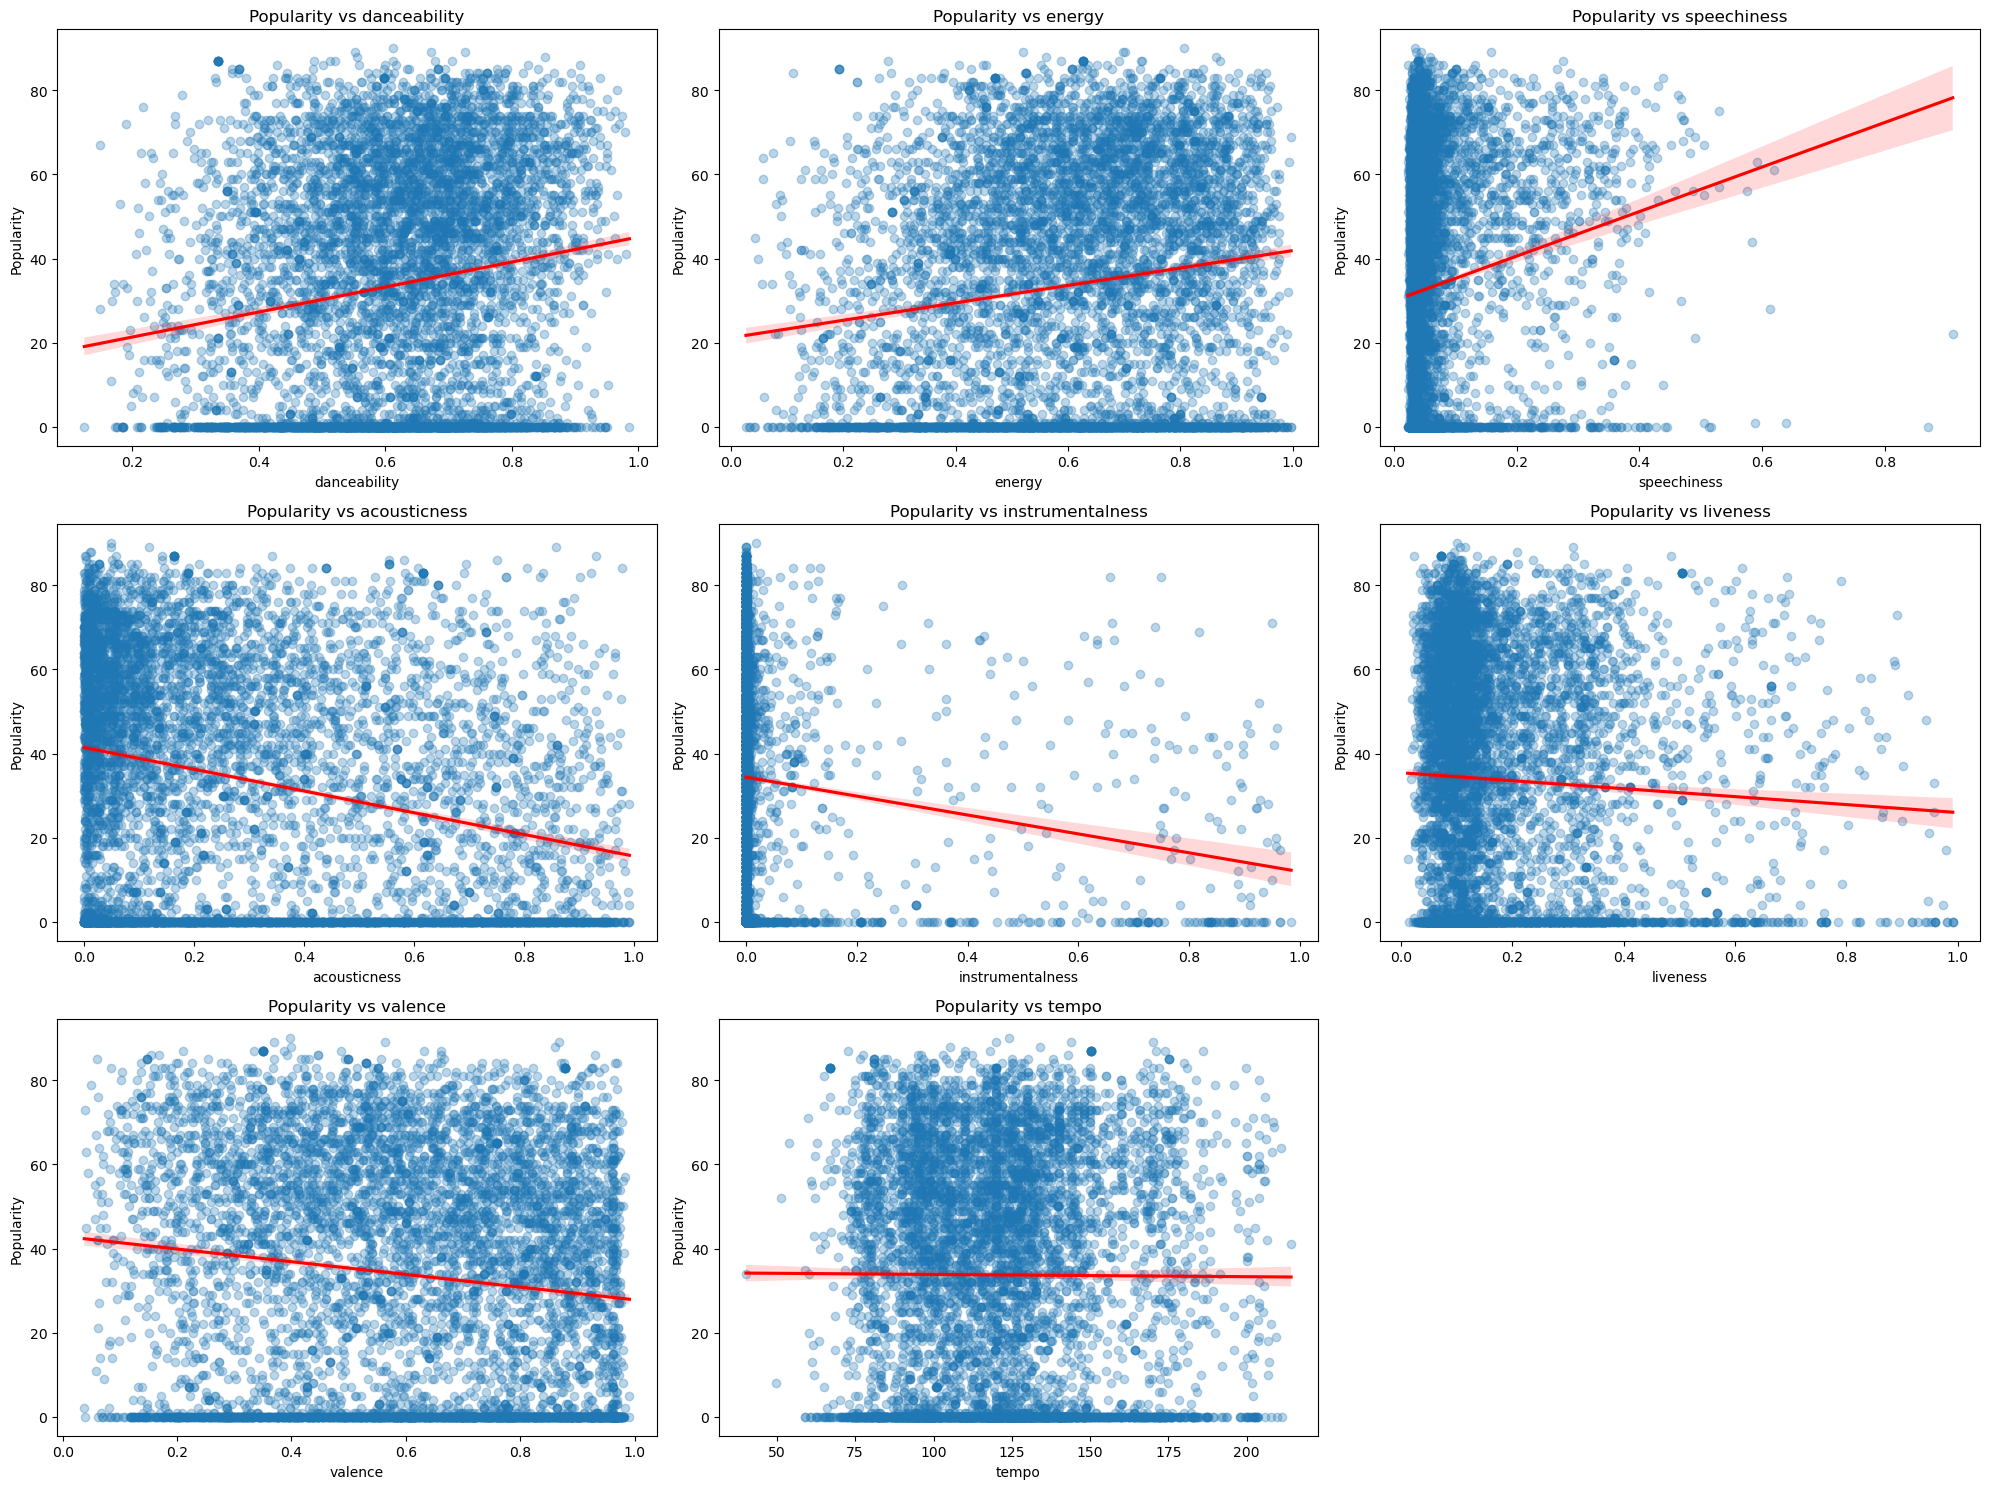

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

total_df = updated_tracks_df_genre.copy()

# List of audio features to compare with popularity
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo']

# Create scatter plots with regression lines
plt.figure(figsize=(20, 15))

for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)  # Adjust grid size if more/less features
    sns.regplot(data=total_df, x=feature, y='track_pop', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

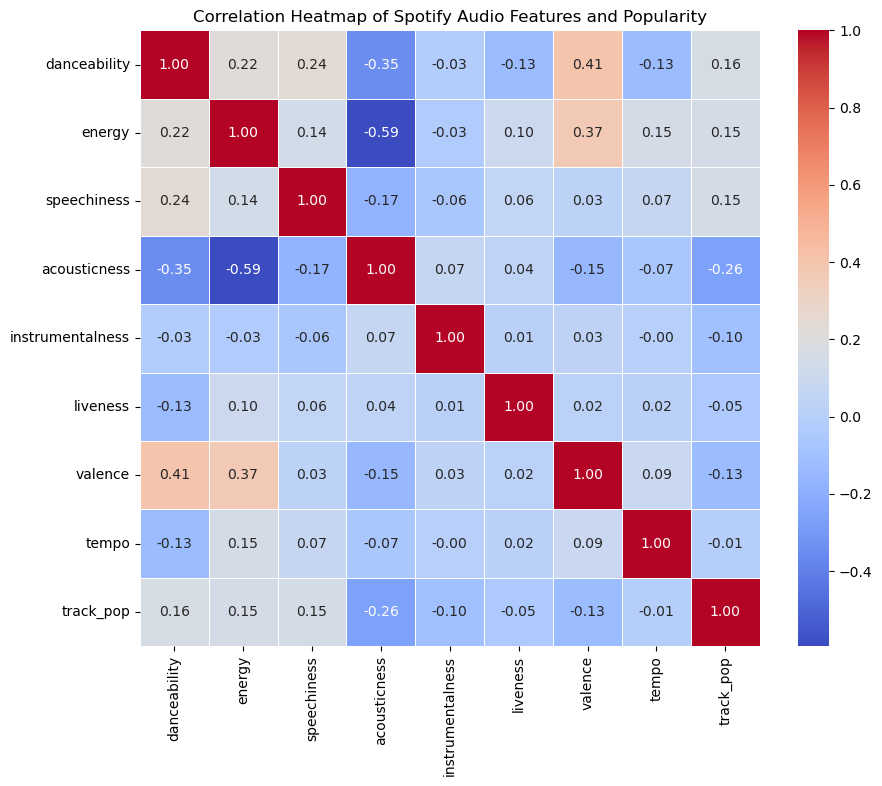

In [18]:
#total_df = updated_tracks_df_genre.copy()
total_df = updated_tracks_df.copy()
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'track_pop']

# Filter the dataframe for these columns
features_df = total_df[audio_features]

# Compute the correlation matrix
correlation_matrix = features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Spotify Audio Features and Popularity')
plt.show()

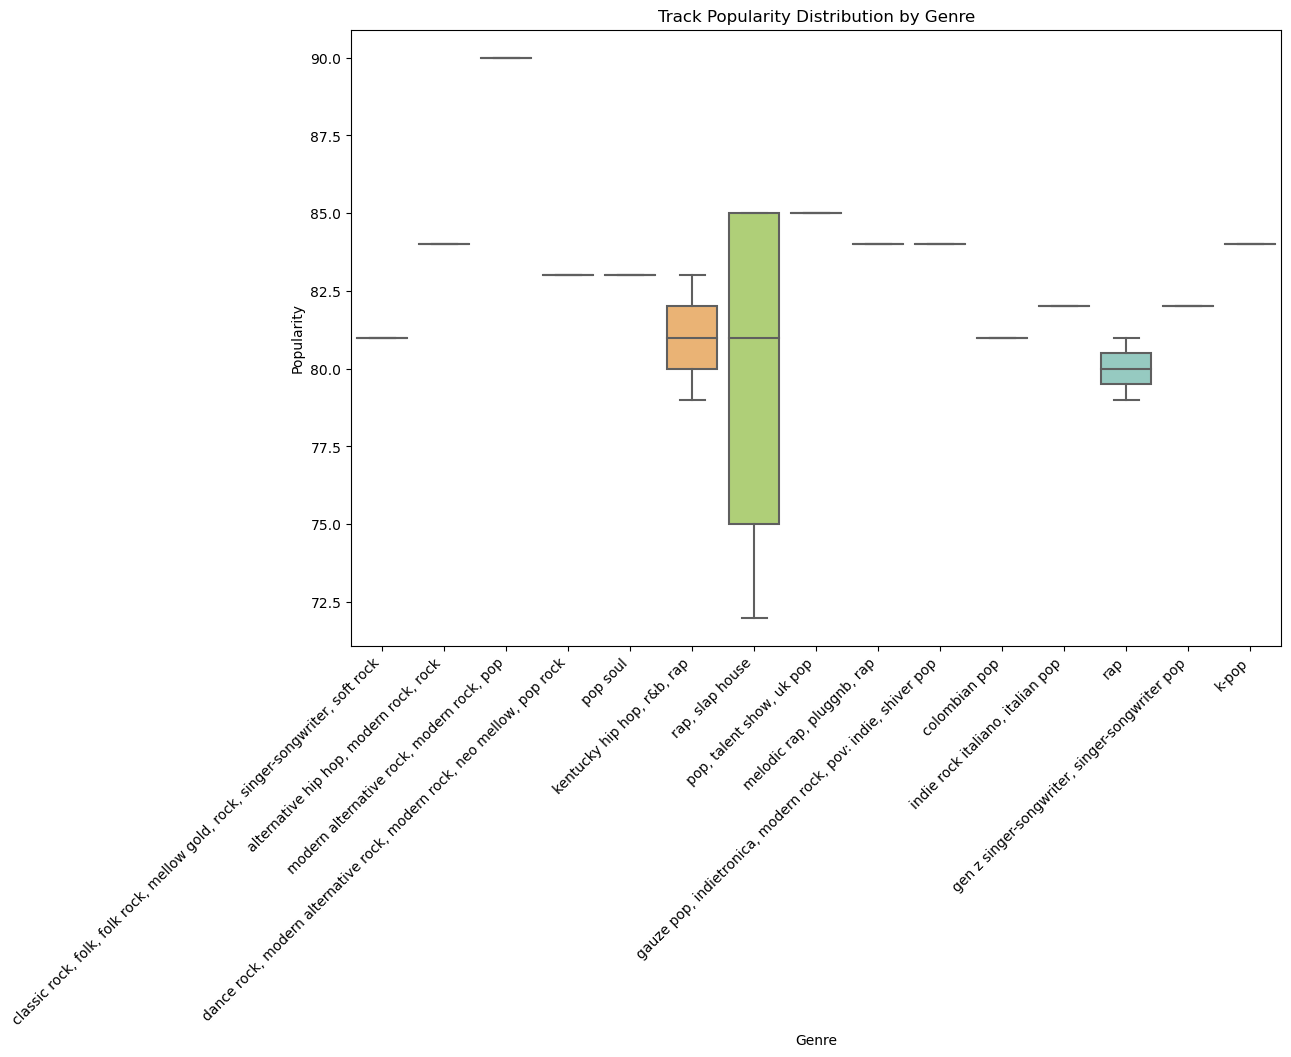

In [24]:
# Step 1: Expand the genres column into individual rows
# Assuming 'genres' column contains lists of genres
expanded_df = total_df.explode('genres')  # Expands lists into rows

# Step 2: Calculate average popularity per genre (optional for sorting)
genre_popularity = expanded_df.groupby('genres')['track_pop'].mean().sort_values(ascending=False)

# Optional: Select top N genres for better visualization
top_genres = genre_popularity.head(15).index  # Top 15 genres by average popularity
filtered_df = expanded_df[expanded_df['genres'].isin(top_genres)]

# Step 3: Create a boxplot to visualize the distribution of popularity by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='genres', y='track_pop', palette='Set3')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for readability
plt.title('Track Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

                                              track_uri  \
1127  spotify:local:Robert+Knight:Night+Train+to+Nas...   
1519  spotify:local:The+Who:Rock+Band:Won%27t+Get+Fo...   
1647  spotify:local:Jud+Strunk:Billboard+Top+100+of+...   
1650  spotify:local:The+Blue+Ridge+Rangers:The+Blue+...   
1693  spotify:local:George+Harrison:The+Best+Of:Give...   

                                 track_name             artist_name  \
1127                       Everlasting Love           Robert Knight   
1519                 Won't Get Fooled Again                 The Who   
1647                            Daisy A Day              Jud Strunk   
1650               Jambalaya (On the Bayou)  The Blue Ridge Rangers   
1693  Give Me Love (Give Me Peace On Earth)         George Harrison   

                          album  track_pop  danceability  energy  key  \
1127   Night Train to Nashville          0           NaN     NaN  NaN   
1519                  Rock Band          0           NaN     NaN  NaN   

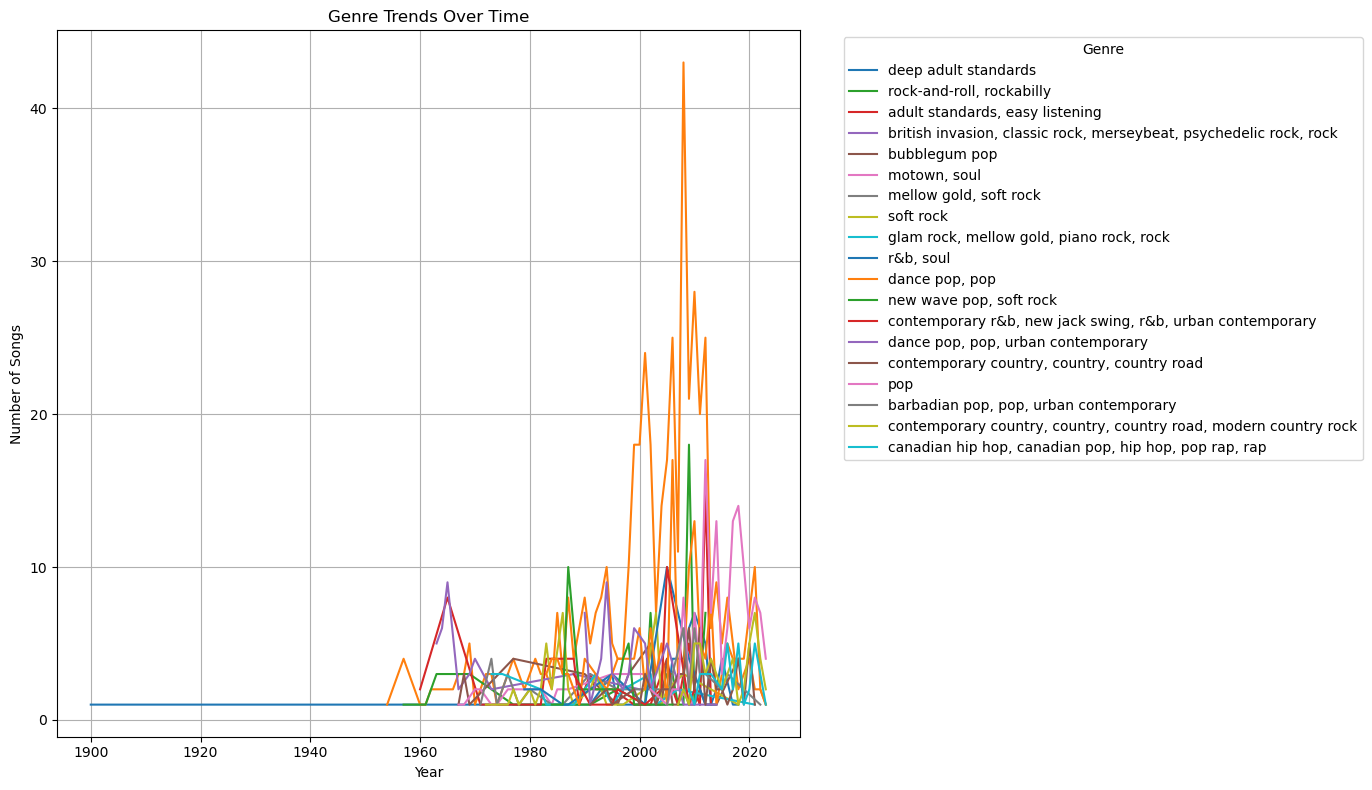

In [35]:
total_df['release_date'] = pd.to_datetime(total_df['release_date'], format='mixed', errors='coerce')

# Step 2: Extract the year
total_df['release_year'] = total_df['release_date'].dt.year

# Check for null values after conversion
missing_dates = total_df[total_df['release_date'].isnull()]
if not missing_dates.empty:
    print("Warning: Some release_date values could not be parsed. Here are a few examples:")
    print(missing_dates.head())

# Step 2: Expand the genres column
expanded_df = total_df.explode('genres')

# Step 3: Count the number of songs per genre per year
genre_trends = expanded_df.groupby(['release_year', 'genres']).size().reset_index(name='song_count')

# Step 4: Filter to top genres (optional)
top_genres = expanded_df['genres'].value_counts().head(20).index  # Top 11 genres
filtered_trends = genre_trends[genre_trends['genres'].isin(top_genres)]

# Step 5: Plot the trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_trends, x='release_year', y='song_count', hue='genres', palette='tab10')
plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()

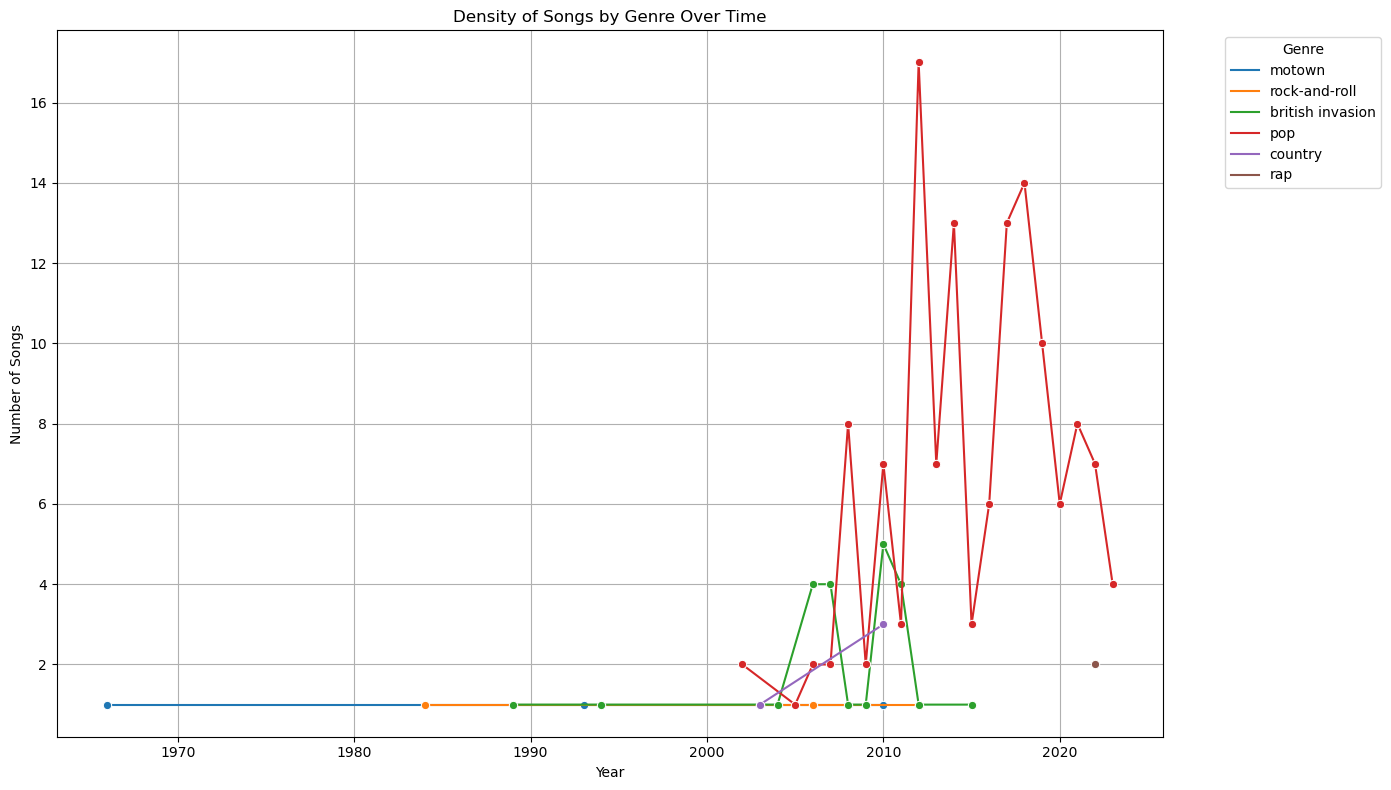

In [33]:
# Step 1: Standardize and Extract Release Year
total_df['release_date'] = pd.to_datetime(total_df['release_date'], format='mixed', errors='coerce')
total_df['release_year'] = total_df['release_date'].dt.year

# Step 2: Filter the Data for Specific Genres
genres_of_interest = ['british invasion', 'country', 'rap', 'pop', 'rock-and-roll', 'motown']
expanded_df = total_df.explode('genres')  # Expand genres into individual rows
filtered_df = expanded_df[expanded_df['genres'].isin(genres_of_interest)]

# Step 3: Group and Count Songs by Year and Genre
genre_density = filtered_df.groupby(['release_year', 'genres']).size().reset_index(name='song_count')

# Step 4: Plot Density Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_density, x='release_year', y='song_count', hue='genres', marker='o', palette='tab10')
plt.title('Density of Songs by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

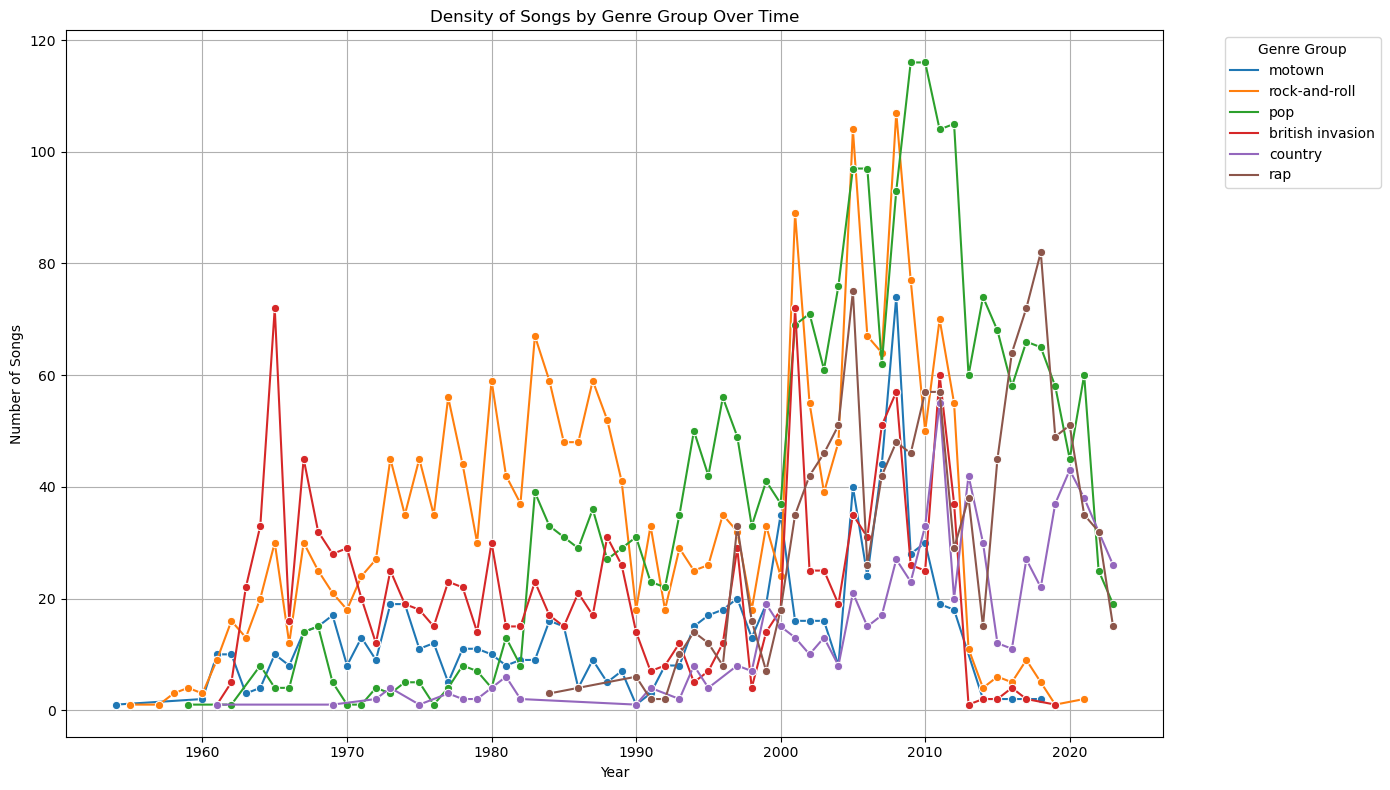

In [51]:
# Step 1: Define a mapping of genres to groups
genre_mapping = {
    'motown': ['motown', 'soul'],
    'british invasion': ['british invasion', 'classic rock', 'psychedelic rock', 'merseybeat', 'rock'],
    'country': ['country', 'country road', 'contemporary country'],
    'rap': ['rap', 'hip hop', 'canadian hip hop', 'pop rap'],
    'pop': ['pop', 'dance pop', 'new wave pop', 'canadian pop', 'bubblegum pop'],
    'rock-and-roll': ['rock-and-roll', 'soft rock', 'rock'],
}

# Step 2: Create a reverse mapping for lookup
reverse_mapping = {genre: group for group, genres in genre_mapping.items() for genre in genres}

# Step 3: Standardize and Extract Release Year
total_df['release_date'] = pd.to_datetime(total_df['release_date'], format='mixed', errors='coerce')
total_df['release_year'] = total_df['release_date'].dt.year

# Step 4: Expand genres into individual rows and map to groups
expanded_df = total_df.explode('genres')
expanded_df['genre_group'] = expanded_df['genres'].map(reverse_mapping)

# Step 5: Filter rows with valid genre groups
filtered_df = expanded_df[expanded_df['genre_group'].notna()]

# Step 6: Group and Count Songs by Year and Genre Group
grouped_density = filtered_df.groupby(['release_year', 'genre_group']).size().reset_index(name='song_count')

# Step 7: Plot Density Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_density, x='release_year', y='song_count', hue='genre_group', marker='o', palette='tab10')
plt.title('Density of Songs by Genre Group Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Genre Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
import plotly.express as px

# Prepare data for scatter plot
# Ensure 'genres' or 'genre_group' is present in the data
scatter_data = expanded_df[['release_year', 'track_pop', 'track_name', 'genres', 'artist_name', 'genre_group']]

# Create scatter plot with hover information and color-coded by genre group
fig = px.scatter(
    scatter_data,
    x='release_year',
    y='track_pop',
    color='genre_group',  # Color by genre group
    hover_data=['track_name', 'artist_name', 'genres'],  # Display song details on hover
    title='Track Popularity Over Time by Genre Group',
    labels={'release_year': 'Year', 'track_pop': 'Popularity', 'genre_group': 'Genre Group'},
    color_discrete_sequence=px.colors.qualitative.Set3  # Optional: Custom color palette
)

fig.show()


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

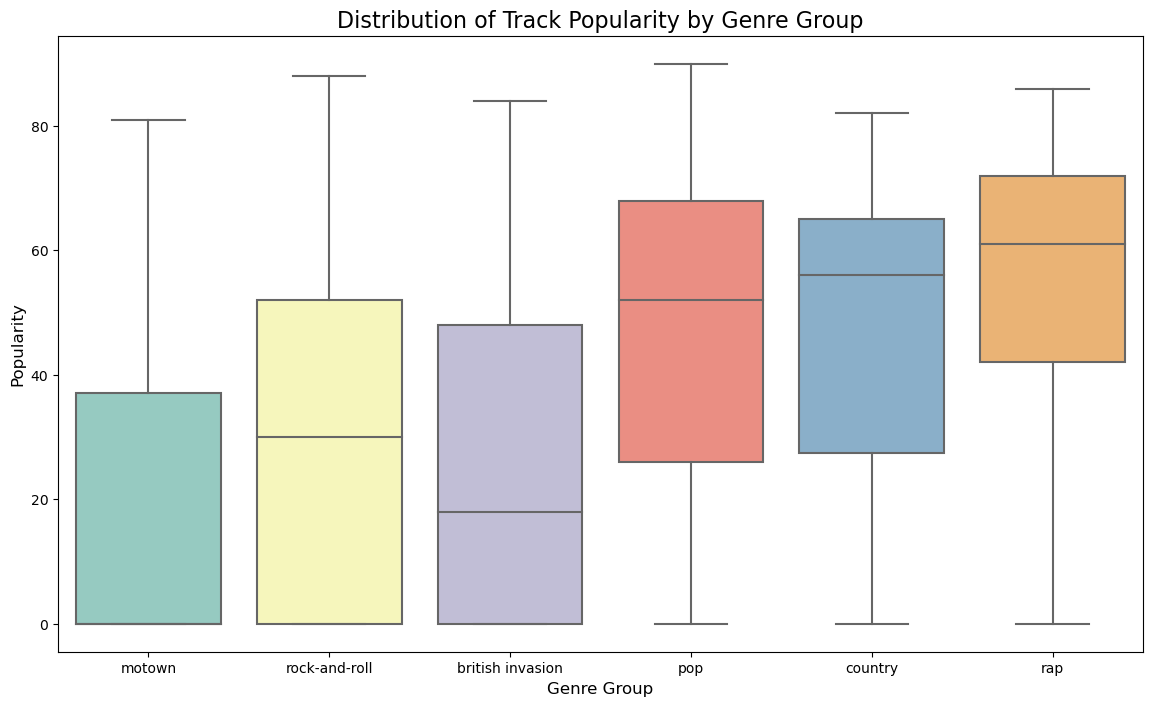

In [53]:
# Ensure the data contains genre groups and popularity
boxplot_data = expanded_df[['genre_group', 'track_pop']].dropna()

# Set up the figure
plt.figure(figsize=(14, 8))

# Create the boxplot
sns.boxplot(
    data=boxplot_data, 
    x='genre_group', 
    y='track_pop', 
    palette='Set3'
)

# Add titles and labels
plt.title('Distribution of Track Popularity by Genre Group', fontsize=16)
plt.xlabel('Genre Group', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks

In [57]:
# Step 1: Select features for the correlation matrix
features = ['danceability', 'energy', 'valence', 'tempo', 
            'speechiness', 'acousticness', 'instrumentalness', 'track_pop']

# Filter the dataset for these features
correlation_data = total_df[features]

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Create the interactive heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=True,  # Display correlation values in cells
    color_continuous_scale='Viridis',  # Diverging color scale for correlations
    title='Interactive Correlation Matrix of Audio Features',
    labels=dict(color='Correlation'),  # Label the color bar
)

# Customize layout
fig.update_layout(
    xaxis_title='Audio Features',
    yaxis_title='Audio Features',
    xaxis_tickangle=45,  # Rotate feature names for better readability
    autosize=True,
    coloraxis_colorbar=dict(tickvals=[-1, 0, 1], ticktext=['-1 (Negative)', '0 (Neutral)', '1 (Positive)']),
)

# Display the plot
fig.show()

In [ ]:
#genre and frequency/popularity
#heatmap
#

#genre over time - interactive
#select genre with button, see the dancability metrics




In [ ]:
# Assume you have album IDs from the initial data pull
album_ids = ["album_id1", "album_id2", ...]  # List of album IDs
albums = sp.albums(album_ids)
for album in albums['albums']:
    print(f"Album: {album['name']}, Release Date: {album['release_date']}")
    
# Album popularity example
for album in albums['albums']:
    print(f"Album: {album['name']}, Popularity: {album['popularity']}")